In [35]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

# Reading the files

In [36]:
folder="${fastMCKalmanOptTesting}/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

resol = folder[folder.index("MC_") + 3: folder.index("smear")]

spread_0 = "(100,-0.01,0.01)"
spread_1 = "(100,-0.01,0.01)"
spread_2 = "(100,-0.01,0.01)"
spread_3 = "(100,-0.01,0.01)"
spread_4 = "(100,-0.4,0.4)"
spread_p = "(100,-0.4,0.4)"

if(resol=="00005"):   
    spread_0 = "(100,-0.01,0.01)"
    spread_1 = "(100,-0.01,0.01)"
    spread_2 = "(100,-0.01,0.01)"
    spread_3 = "(100,-0.01,0.01)"
    spread_4 = "(100,-0.3,0.3)"
    spread_p = "(100,-0.3,0.3)"

if(resol=="01"):   
    spread_0 = "(100,-0.4,0.4)"
    spread_1 = "(100,-0.4,0.4)"
    spread_2 = "(100,-0.2,0.2)"
    spread_3 = "(100,-0.2,0.2)"
    spread_4 = "(150,-0.4,0.4)"
    spread_p = "(150,-0.4,0.4)"

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_

# Setting the Aliases

In [37]:
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(tree)
tree.SetAlias("p0MC","part.fParamMC[1].fP[0]")
tree.SetAlias("p0In","part.fParamIn[1].fP[0]")

tree.SetAlias("p1MC","part.fParamMC[1].fP[1]")
tree.SetAlias("p1In","part.fParamIn[1].fP[1]")

tree.SetAlias("p2MC","part.fParamMC[1].fP[2]")
tree.SetAlias("p2In","part.fParamIn[1].fP[2]")

tree.SetAlias("p3MC","part.fParamMC[1].fP[3]")
tree.SetAlias("p3In","part.fParamIn[1].fP[3]")

tree.SetAlias("p4MC","part.fParamMC[1].fP[4]")
tree.SetAlias("p4In","part.fParamIn[1].fP[4]")

tree.SetAlias("pMC","part.fParamMC[1].fData.P()")
tree.SetAlias("pIn","part.fParamIn[1].fData.P()")

tree.SetAlias("Res0MC","(p0In-p0MC)/p0MC")
tree.SetAlias("Res1MC","(p1In-p1MC)/p1MC")
tree.SetAlias("Res2MC","(p2In-p2MC)/p2MC")
tree.SetAlias("Res3MC","(p3In-p3MC)/p3MC")
tree.SetAlias("Res4MC","(p4In-p4MC)/p4MC")
tree.SetAlias("RespMC","(pIn-pMC)/pMC")

tree.SetAlias("sigmaqPt0","sqrt(part.fParamIn[1].fC[14])")
tree.SetAlias("sigmaPtRel0","sigmaqPt0*ptMC")
tree.SetAlias("LArm","getStat(2)")

tree.SetAlias("isOK","part.fStatusMaskIn.fData[1]==31") 
#part.fStatusMaskIn.fData[1]==31



True

In [38]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(treeSeed)
treeSeed.SetAlias("p0MC","input.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("p0Seed","seed.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("c00Seed","sqrt(seed.AliExternalTrackParam.fC[0])")

treeSeed.SetAlias("p1MC","input.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("p1Seed","seed.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("c11Seed","sqrt(seed.AliExternalTrackParam.fC[2])")

treeSeed.SetAlias("p2MC","input.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("p2Seed","seed.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("c22Seed","sqrt(seed.AliExternalTrackParam.fC[5])")

treeSeed.SetAlias("p3MC","input.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("p3Seed","seed.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("c33Seed","sqrt(seed.AliExternalTrackParam.fC[9])")

treeSeed.SetAlias("p4MC","input.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("p4Seed","seed.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("c44Seed","sqrt(seed.AliExternalTrackParam.fC[14])")

treeSeed.SetAlias("c01SeedFull","seed.AliExternalTrackParam.fC[1]")

treeSeed.SetAlias("c02SeedFull","seed.AliExternalTrackParam.fC[3]")
treeSeed.SetAlias("c12SeedFull","seed.AliExternalTrackParam.fC[4]")

treeSeed.SetAlias("c03SeedFull","seed.AliExternalTrackParam.fC[6]")
treeSeed.SetAlias("c13SeedFull","seed.AliExternalTrackParam.fC[7]")
treeSeed.SetAlias("c23SeedFull","seed.AliExternalTrackParam.fC[8]")

treeSeed.SetAlias("c04SeedFull","seed.AliExternalTrackParam.fC[10]")
treeSeed.SetAlias("c14SeedFull","seed.AliExternalTrackParam.fC[11]")
treeSeed.SetAlias("c24SeedFull","seed.AliExternalTrackParam.fC[12]")
treeSeed.SetAlias("c34SeedFull","seed.AliExternalTrackParam.fC[13]")

treeSeed.SetAlias("pMC","input.AliExternalTrackParam.GetP()")
treeSeed.SetAlias("pSeed","seed.AliExternalTrackParam.GetP()")

treeSeed.SetAlias("Res0MC","(p0Seed-p0MC)/p0MC")
treeSeed.SetAlias("Res1MC","(p1Seed-p1MC)/p1MC")
treeSeed.SetAlias("Res2MC","(p2Seed-p2MC)/p2MC")
treeSeed.SetAlias("Res3MC","(p3Seed-p3MC)/p3MC")
treeSeed.SetAlias("Res4MC","(p4Seed-p4MC)/p4MC")
treeSeed.SetAlias("RespMC","(pSeed-pMC)/pMC")


True

# Kalman Residuals

 FCN=763.577 FROM MIGRAD    STATUS=CONVERGED     256 CALLS         257 TOTAL
                     EDM=3.27124e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.69216e+03   8.44642e+01  -5.84109e-02  -2.51564e-08
   2  p1          -1.02400e-04   1.44163e-04   1.34226e-07  -2.00488e+00
   3  p2           8.78241e-03   2.12287e-04  -1.38840e-06  -2.12423e-02
   4  p3           5.19010e-01   1.99790e-02   1.87337e-05  -9.44838e-03
   5  p4          -1.07335e-03   1.52888e-03  -3.27556e-06  -1.06098e-01
   6  p5           7.41760e-02   3.07416e-03  -2.07294e-06  -3.60055e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Kalman_p0_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Kalman_p1_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Kalman_p2_Resid.png has been created
Warning in

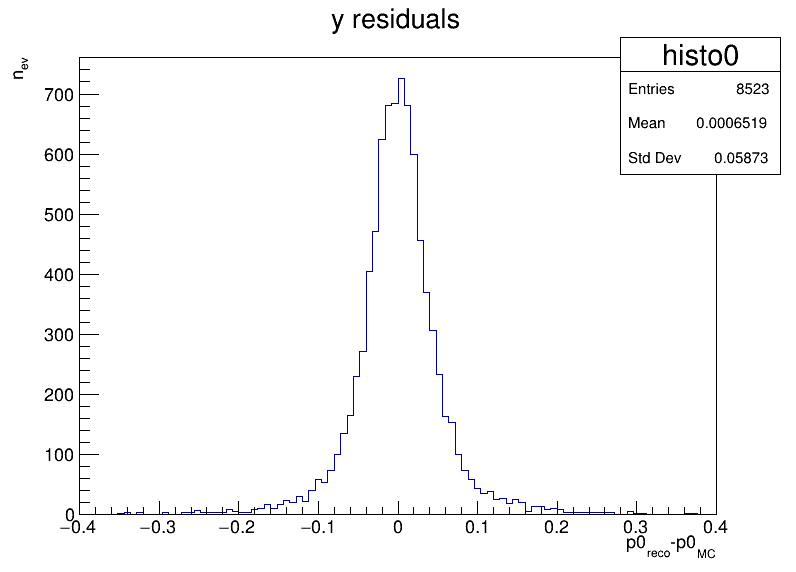

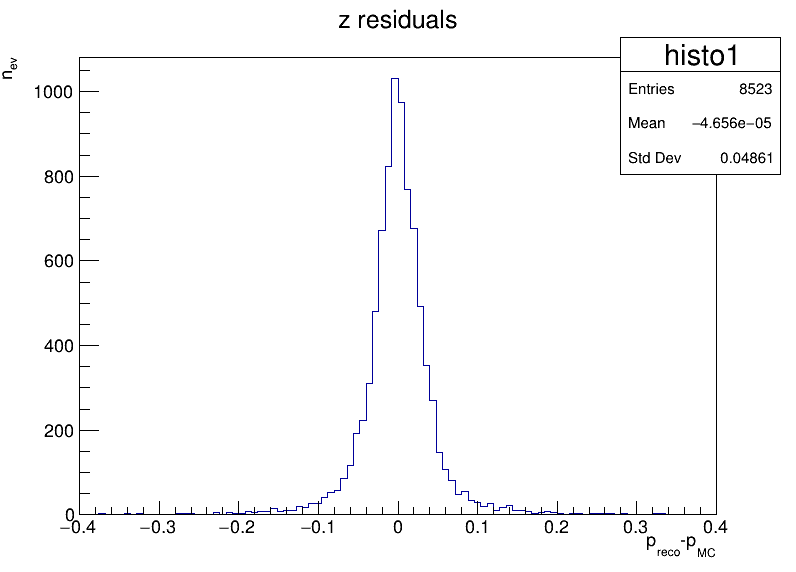

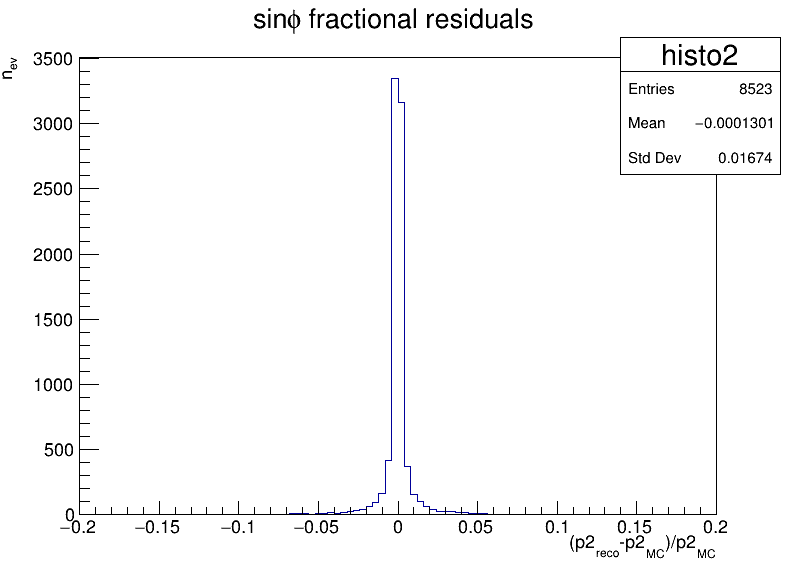

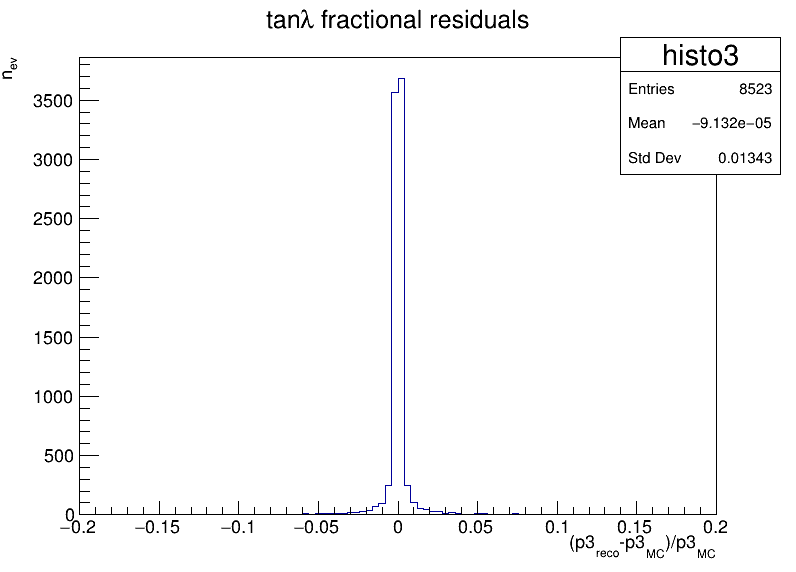

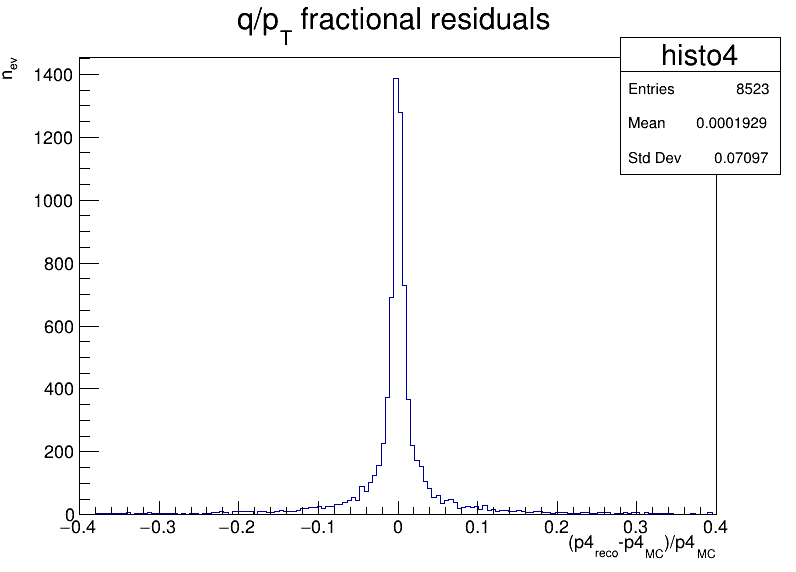

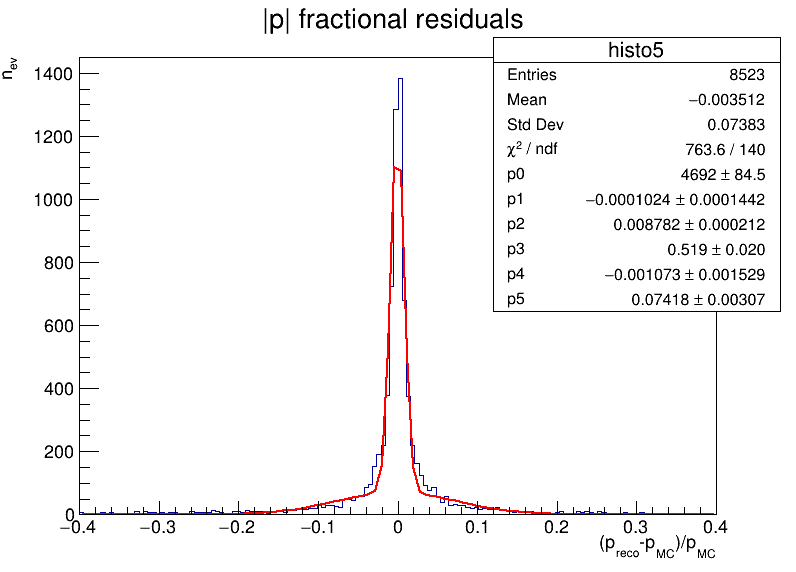

In [39]:
gStyle.SetOptFit(1)
gStyle.SetOptStat(1)

c0 = ROOT.TCanvas("myCanvasName0","The Canvas Title0",800,600)
instruction = "(p0In-p0MC)>>histo0"+spread_0
tree.Draw(instruction,"isOK")
histo0 = ROOT.gDirectory.Get("histo0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
c0.Draw()
save=folder+"Kalman_p0_Resid"+".png"
c0.Print(save)

c1 = ROOT.TCanvas("myCanvasName1","The Canvas Title1",800,600)
instruction = "(p1In-p1MC)>>histo1"+spread_1
tree.Draw(instruction,"isOK")
histo1 = ROOT.gDirectory.Get("histo1")
histo1.SetTitle("z residuals;p_{reco}-p_{MC};n_{ev}")
c1.Draw()
save=folder+"Kalman_p1_Resid"+".png"
c1.Print(save)

c2 = ROOT.TCanvas("myCanvasName2","The Canvas Title2",800,600)
instruction = "Res2MC>>histo2"+spread_2
tree.Draw(instruction,"isOK")
histo2 = ROOT.gDirectory.Get("histo2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/p2_{MC};n_{ev}")
c2.Draw()
save=folder+"Kalman_p2_Resid"+".png"
c2.Print(save)

c3 = ROOT.TCanvas("myCanvasName3","The Canvas Title3",800,600)
instruction = "Res3MC>>histo3"+spread_3
tree.Draw(instruction,"isOK")
histo3 = ROOT.gDirectory.Get("histo3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/p3_{MC};n_{ev}")
c3.Draw()
save=folder+"Kalman_p3_Resid"+".png"
c3.Print(save)

c4 = ROOT.TCanvas("myCanvasName4","The Canvas Title4",800,600)
instruction = "Res4MC>>histo4"+spread_4
tree.Draw(instruction,"isOK")
histo4 = ROOT.gDirectory.Get("histo4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/p4_{MC};n_{ev}")
c4.Draw()
save=folder+"Kalman_p4_Resid"+".png"
c4.Print(save)


cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
instruction = "RespMC>>histo5"+spread_p
tree.Draw(instruction,"isOK")
histo5 = ROOT.gDirectory.Get("histo5")
histo5.SetTitle("|p| fractional residuals;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
Formula = "0.39894228040143*"+str(histo5.GetBinWidth(0))+"*([0]/[2])*(exp(-0.5*((x-[1])/[2])^2)+[3]*exp(-0.5*((x-([1]+[4]))/[5])^2)*([2]/[5]))"
double_gauss0 = ROOT.TF1("double_gauss0",Formula,-0.4,0.4)
double_gauss0.SetParameters(histo5.GetEntries(),histo5.GetMean(),histo5.GetRMS(),0.5,histo5.GetRMS(),histo5.GetRMS())
double_gauss0.SetParLimits(2, 0, 1)
histo5.Fit("double_gauss0")
cp.Draw()
save=folder+"Kalman_p_Resid"+".png"
cp.Print(save)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamep
Warning in <TSelectorDraw::Begin>: Deleting old histogram with different dimensions


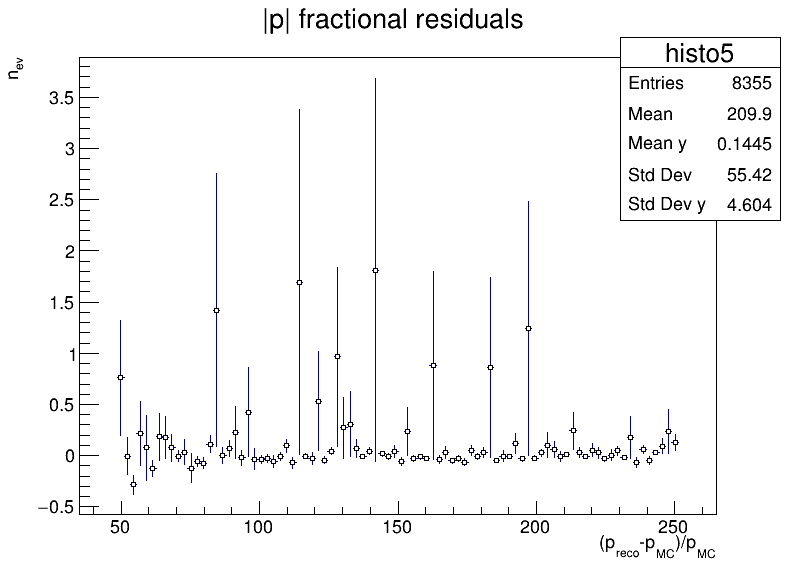

In [40]:

cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
instruction = "RespMC:LArm>>histo5"
tree.Draw(instruction,"isOK&&LArm>50","prof")
histo5 = ROOT.gDirectory.Get("histo5")
histo5.SetTitle("|p| fractional residuals;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
cp.Draw()
save=folder+"Kalman_p_Resid"+".png"
#cp.Print(save)

# Seed Residuals

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Helix_p0_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Helix_p1_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Helix_p2_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting ca

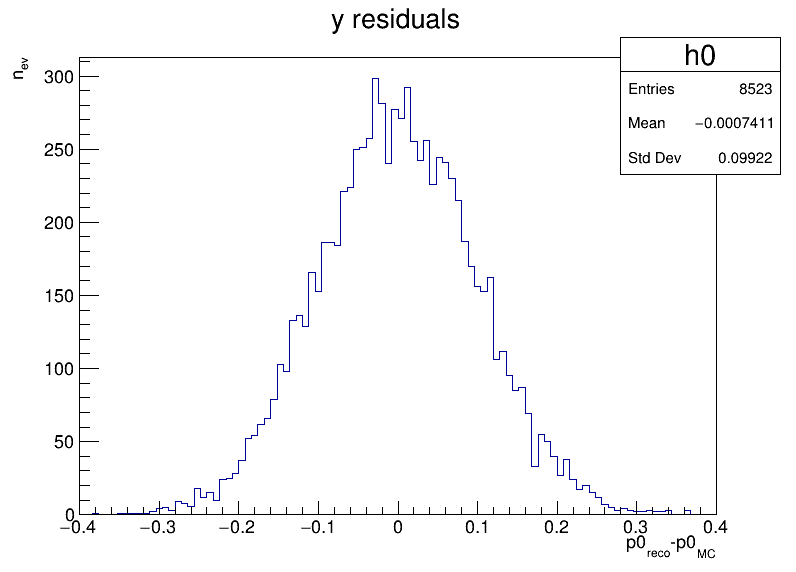

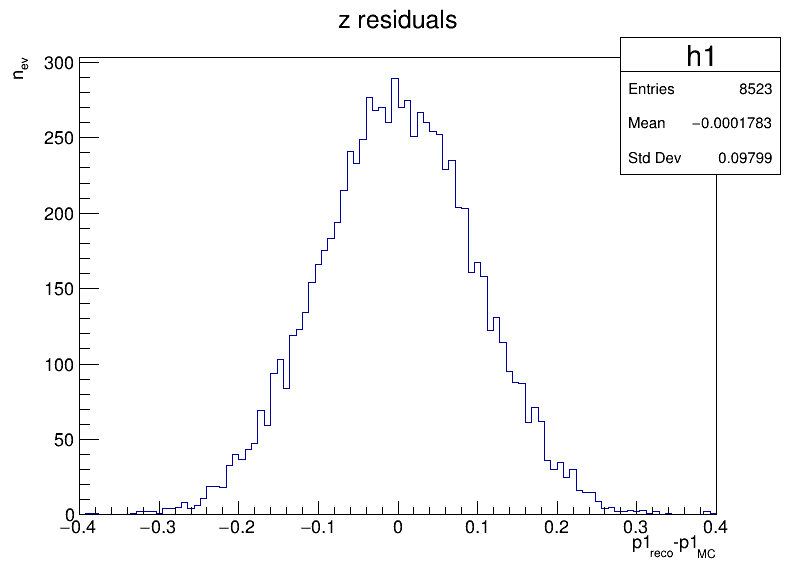

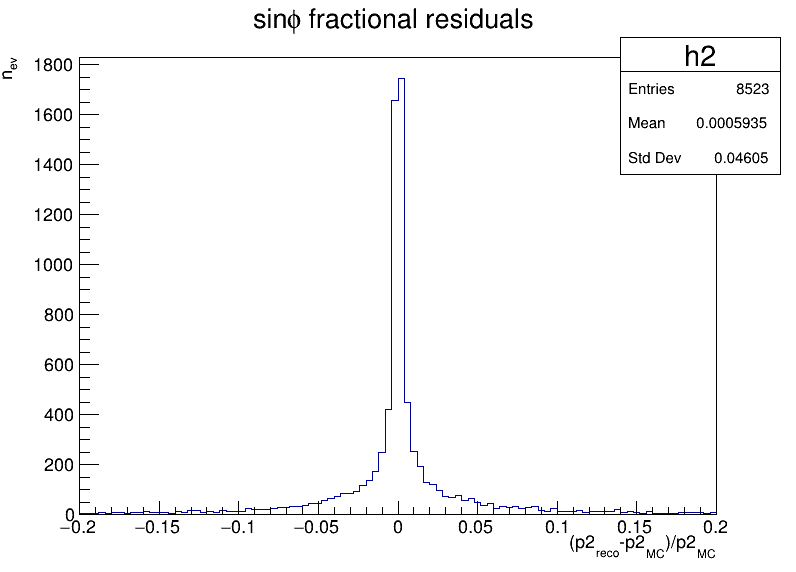

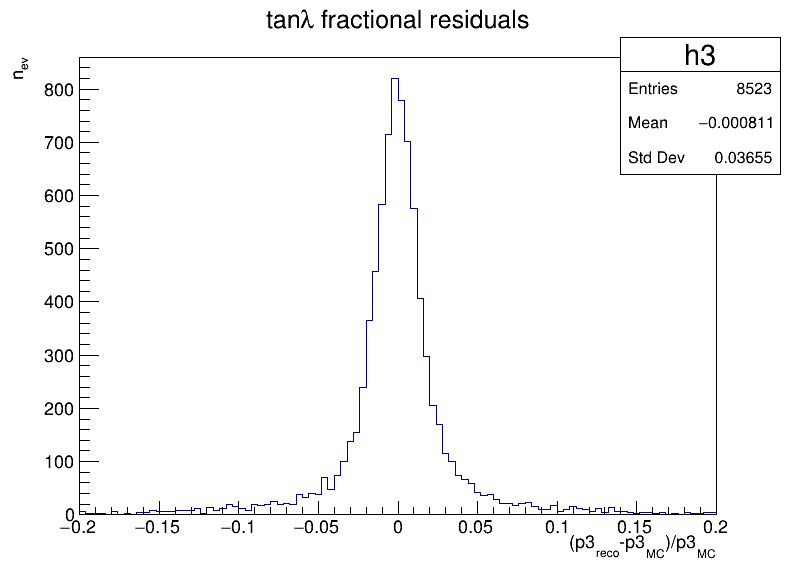

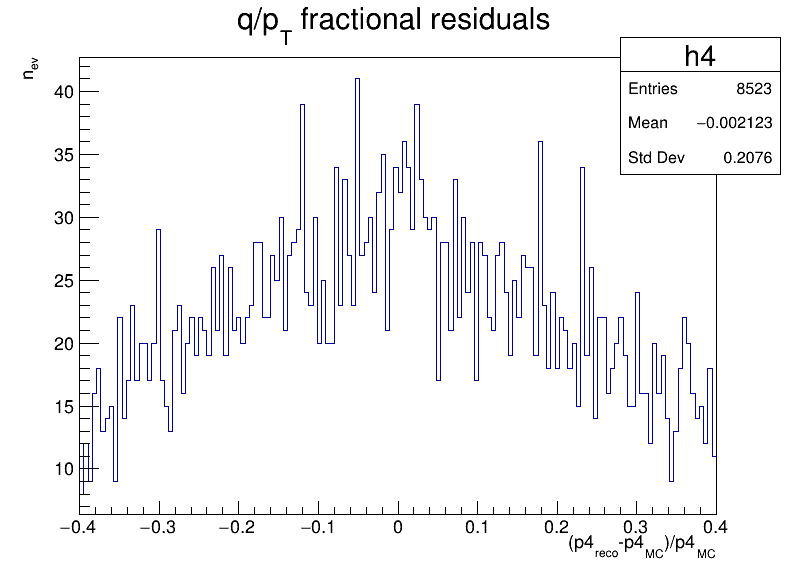

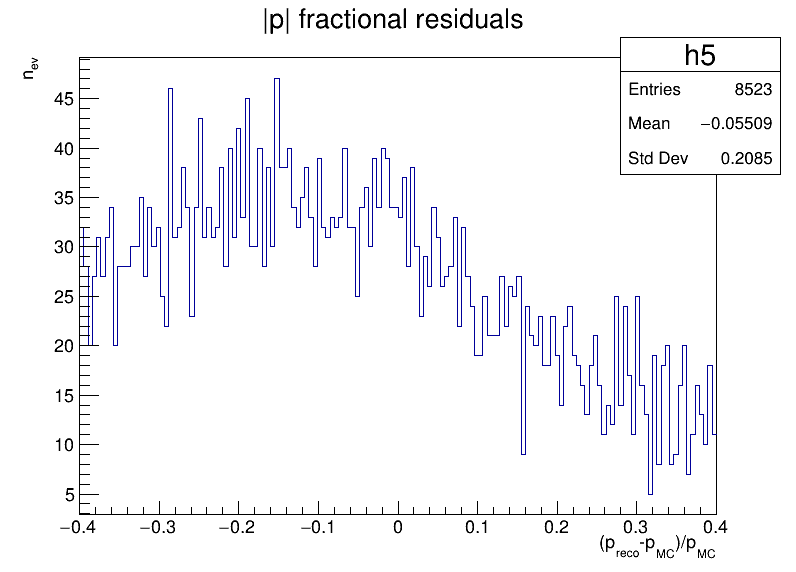

In [41]:
h0 = ROOT.TCanvas("h0","h0",800,600)
instruction = "p0Seed-p0MC>>h0"+spread_0
treeSeed.Draw(instruction)
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
h0.Draw()
save=folder+"Helix_p0_Resid"+".png"
h0.Print(save)

h1 = ROOT.TCanvas("h1","h1",800,600)
instruction = "p1Seed-p1MC>>h1"+spread_1
treeSeed.Draw(instruction)
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
h1.Draw()
save=folder+"Helix_p1_Resid"+".png"
h1.Print(save)

h2 = ROOT.TCanvas("h2","h2",800,600)
instruction = "Res2MC>>h2"+spread_2
treeSeed.Draw(instruction)
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/p2_{MC};n_{ev}")
h2.Draw()
save=folder+"Helix_p2_Resid"+".png"
h2.Print(save)

h3 = ROOT.TCanvas("h3","h3",800,600)
instruction = "Res3MC>>h3"+spread_3
treeSeed.Draw(instruction)
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/p3_{MC};n_{ev}")
h3.Draw()
save=folder+"Helix_p3_Resid"+".png"
h3.Print(save)

h4 = ROOT.TCanvas("h4","h4",800,600)
instruction = "Res4MC>>h4"+spread_4
treeSeed.Draw(instruction)
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/p4_{MC};n_{ev}")
h4.Draw()
save=folder+"Helix_p4_Resid"+".png"
h4.Print(save)

cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
instruction = "RespMC>>h5"+spread_p
treeSeed.Draw(instruction)
histo5 = ROOT.gDirectory.Get("h5")
histo5.SetTitle("|p| fractional residuals;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
cp.Draw()
save=folder+"Helix_p_Resid"+".png"
cp.Print(save)

# Checking the simulation status

Warning in <TROOT::Append>: Replacing existing TH1: hstatus (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cstatus
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt150/MC_01smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/status.png has been created


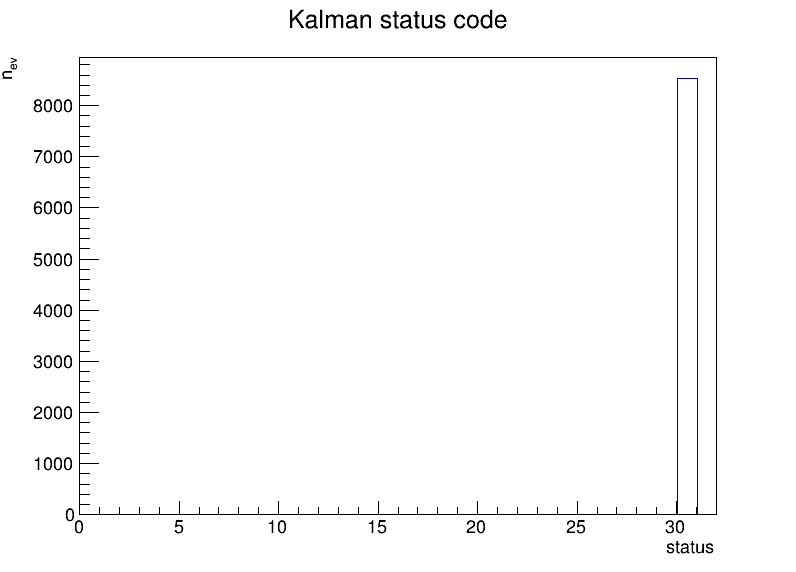

In [42]:
hstatus   = ROOT.TH1D( 'hstatus', 'status', 33, 0, 32 )

for iev in range(tree.GetEntries()):
    tree.GetEntry(iev)
    size = tree.part.fStatusMaskIn.size()
    status=0
    for i in range(size-1):
        status = tree.part.fStatusMaskIn[size-i-1]
        if(i!=0 and status!=31):
            #print(status)
            break
    if(size!=0): hstatus.Fill(status) 
        

gStyle.SetOptStat(0)
cstatus = ROOT.TCanvas("cstatus","cstatus",800,600)
hstatus.SetTitle("Kalman status code;status;n_{ev}")
hstatus.Draw()
cstatus.Draw()
save=folder+"status"+".png"
cstatus.Print(save)